Dataset
https://www.kaggle.com/datasets/kartik2112/fraud-detection

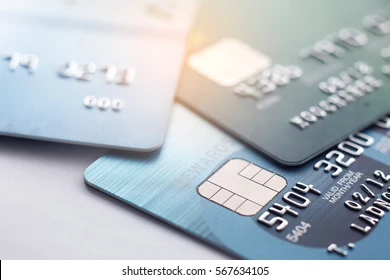


# Task1:- **1)Problem Statement**

The Credit card transaction fraud detection  problem includes modeling past credit card transactions with the knowledge of ones that turned out to be a fraud.
This model is then used to identify whether a new transaction is fraudulent or not .



# 2) **Problem Objective**

The aim of this project is to predict whether a credit card transaction is fraudulent or not ,  which is based on the transaction amount , location  and other transaction related all  the data.

# 3) **About the dataset**

*   Trans_date_trans_time - Transaction time stamp
*   cc_num - Credit card number
*   merchant - merchant name
*   category - transaction category
*   amt - transaction amount
*   first - first name of card holder
*   Last - last name of card holder
*   gender - sex of card holder
*   street - transaction address
*   city -   transaction city
*   state - transaction state
*   zip - transaction zipcode
*   lat - transaction latitude
*   long - transaction longitude
*   city _pop - population of the city
*   job - job of the card holder
*   dob  - date of birth of card holder
*   trans_num - transaction number of transaction
*   unix _time - time in unix format
*   merch_lat - longitude of merchant
*   is_fraud -  nature of transaction
















**Note** :- is_fraud is target variable

<font color = 'blue'>TASK(1):- **Import Libraries** :</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Exploration Steps for all the variables. Write down your findings after every variable exploration

## **Import the dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
Df = pd.read_csv("/content/drive/MyDrive/fraudTest.csv")

# Task 2:- **Data Exploration & Validation**

In [4]:
# To observe first  rows.
Df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0




```
# This is formatted as code
```

There are total 23 columns in the dataset that means we have 23 features in the dataset.

**Note** :- "is_fraud" is the target variable.

## **1) Basic Details of the data**

In [5]:
# To check number of unique values in each feature in the dataset.
Df.nunique()

Unnamed: 0               555719
trans_date_trans_time    226976
cc_num                      904
merchant                    693
category                     14
amt                       37256
first                       341
last                        471
gender                        2
street                      924
city                        849
state                        50
zip                         912
lat                         910
long                        910
city_pop                    835
job                         478
dob                         910
trans_num                555719
unix_time                544760
merch_lat                546490
merch_long               551770
is_fraud                      2
dtype: int64

In [6]:
# To get more information about datatypes in the dataset
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  float64
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [7]:
# General information about the dataset.
Df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800430e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521420e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635330e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992350e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
#Are there any suspicious variables.(Duplicates)
Df.columns.values

array(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
       'category', 'amt', 'first', 'last', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud'],
      dtype=object)

**To get number of rows and columns in the dataset**

In [9]:
# To get number of rows and columns that is dimensions.
Df.shape

(555719, 23)

In [10]:
# To check null values in the dataset.
Df.isnull()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555715,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555716,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
555717,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [11]:
# To check total null values in each feature.
Df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64



**Observations:-**

1)There are 23 variables(features) and 555719 observations

2)In the dataset there are no null values

3) Most of the variables are of object types in dataset , some are float type and some are of int type

In [12]:
# Display the variable formats
Df.dtypes

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                   float64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object

In [13]:
from datetime import datetime

# Apply function utcfromtimestamp and drop column unix_time
Df['time'] = Df['unix_time'].apply(datetime.utcfromtimestamp)
Df.drop('unix_time', axis=1)

# Add cloumn hour of day
Df['hour_of_day'] = Df.time.dt.hour

Time was in the unix format , so converted in the standard time and then from the time hour column in extracted.

In [14]:
# Make two columns "time" & "hour_of_day" in place of "unix_time"
Df[['time','hour_of_day']]

,time,hour_of_day
0,2013-06-21 12:14:25,12
1,2013-06-21 12:14:33,12
2,2013-06-21 12:14:53,12
3,2013-06-21 12:15:15,12
4,2013-06-21 12:15:17,12
...,...,...
555714,2013-12-31 23:59:07,23
555715,2013-12-31 23:59:09,23
555716,2013-12-31 23:59:15,23
555717,2013-12-31 23:59:24,23


Converted unix_time feature in two diffrent features named as "time" & "hour_of_day".
After the conversion there no need to keep unix_time feature , better option is to drop that.

In [15]:
Df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12


In [16]:
Df.columns.values

array(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant',
       'category', 'amt', 'first', 'last', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob',
       'trans_num', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud',
       'time', 'hour_of_day'], dtype=object)

These are the all columns names in the dataset.

In [17]:
#What are the categorical and discrete variables? What are the continues variables.
Df.dtypes
Df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12
1,1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12
2,2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12
3,3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12
4,4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12


In [18]:
# Drop the column 'Unnamed: 0' as it is not involving role in model building.
Df.drop('Unnamed: 0',axis = 1,inplace=True)

**Converted 'trans_date_trans_time' column as individual columns called as 'trans_date' & 'trans_time'. after conversion drop trans_date_trans_time column.**

In [19]:
Df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,21-06-2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12
1,21-06-2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12
2,21-06-2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12
3,21-06-2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12
4,21-06-2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12


In [20]:
Df['trans_year'] = np.int64([d[6:10] for d in Df['trans_date_trans_time']])
Df['trans_month'] = np.int64([d[3:5] for d in Df['trans_date_trans_time']])
Df['trans_Date'] = np.int64([d[0:2] for d in Df['trans_date_trans_time']])

In [21]:
Df['trans_time'] = pd.to_datetime(Df['trans_date_trans_time']).dt.time

In [22]:
# As we split the the column "trans_date_trans_time" in four diffrent columns as "trans_date" ,"trans_month","trans_year" & "trans_time" so now drop the column "trans_date_trans_time".
Df.drop(['trans_date_trans_time'],axis = 1,inplace=True)

In [23]:
# we cannot work on trans_num as there is no unique pattern, so good option will be an drop it
Df = Df.drop("trans_num",axis=1)

In [24]:
Df.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,...,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,...,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,...,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,...,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,...,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00


In [25]:
#Find the frequencies of all class variables in the data.
Df.columns.values

array(['cc_num', 'merchant', 'category', 'amt', 'first', 'last', 'gender',
       'street', 'city', 'state', 'zip', 'lat', 'long', 'city_pop', 'job',
       'dob', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud', 'time',
       'hour_of_day', 'trans_year', 'trans_month', 'trans_Date',
       'trans_time'], dtype=object)

## **2) Categorical Variable Exploration**

**Visualization For Categorical Feature Use**

1.   Frequency Table
2.   Count Plot

1) Frequency Table: frequency table counts cross-tabulation frequencies especially for categorical, discrete variables. It will help us understanding the variable by looking at the values it is taking and data count at each value.

2) Count Plot: Used to Show the counts of observations in each categorical bin using bars.

#### 1) merchant

In [26]:
Df['merchant'].value_counts()

fraud_Kilback LLC                        1859
fraud_Cormier LLC                        1597
fraud_Schumm PLC                         1561
fraud_Kuhn LLC                           1521
fraud_Dickinson Ltd                      1519
                                         ... 
fraud_Treutel-King                        323
fraud_Satterfield-Lowe                    319
fraud_Kessler Group                       318
fraud_Jerde-Hermann                       312
fraud_Ritchie, Bradtke and Stiedemann     304
Name: merchant, Length: 693, dtype: int64

#### 2) category

gas_transport     56370
grocery_pos       52553
home              52345
shopping_pos      49791
kids_pets         48692
shopping_net      41779
entertainment     40104
personal_care     39327
food_dining       39268
health_fitness    36674
misc_pos          34574
misc_net          27367
grocery_net       19426
travel            17449
Name: category, dtype: int64


<Axes: xlabel='count', ylabel='category'>

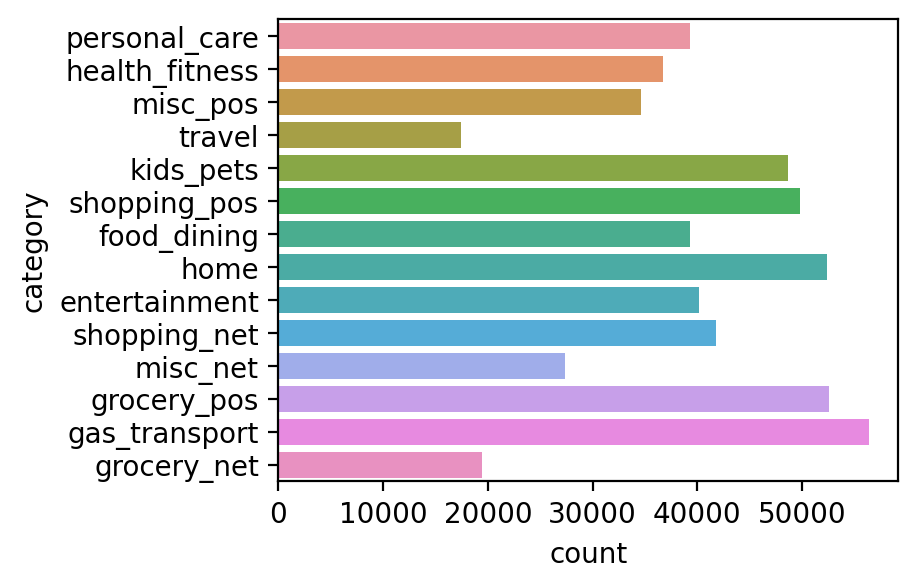

In [27]:
# To count number of transactions in each category.
print(Df['category'].value_counts())
plt.figure(figsize=(4,3),dpi=200)
sns.countplot(y = "category" , data = Df)

**We can see that Most of the transactions are done in gas_transport**

#### 3) first

In [28]:
# checking first and last name columns
Df['first'].value_counts()

Christopher    11443
Robert          9076
Jessica         8655
David           8599
Michael         8530
               ...  
Mike             199
Dennis            12
Evan              12
Bruce             10
Nicole             9
Name: first, Length: 341, dtype: int64

#### 4) last

In [29]:
Df['last'].value_counts()

Smith        12146
Williams     10056
Davis         9524
Johnson       8556
Rodriguez     7485
             ...  
Santiago        12
Bates           12
Robbins         10
Freeman          8
Bartlett         7
Name: last, Length: 471, dtype: int64

In [30]:
# since first and last are now of no use of ours so it is better to drop them

Df = Df.drop(columns=["first","last"])

In [31]:
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,M,351 Darlene Green,Columbia,SC,29209,33.9659,...,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,F,3638 Marsh Union,Altonah,UT,84002,40.3207,...,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00


#### 5) state

TX    40393
NY    35918
PA    34326
CA    24135
OH    20147
MI    19671
IL    18960
FL    18104
AL    17532
MO    16501
MN    13719
AR    13484
NC    12868
SC    12541
KY    12506
VA    12506
WI    12370
IN    11959
IA    11819
OK    11379
GA    11277
MD    11152
WV    10838
NJ    10528
NE    10257
KS     9943
LA     8988
MS     8833
WY     8454
WA     8116
OR     7811
TN     7359
NM     7020
ME     6928
ND     6397
CO     5886
SD     5250
MA     5186
MT     5052
VT     5044
UT     4658
AZ     4592
NH     3449
CT     3277
ID     2490
NV     2451
DC     1517
HI     1090
AK      843
RI      195
Name: state, dtype: int64


<Axes: xlabel='count', ylabel='state'>

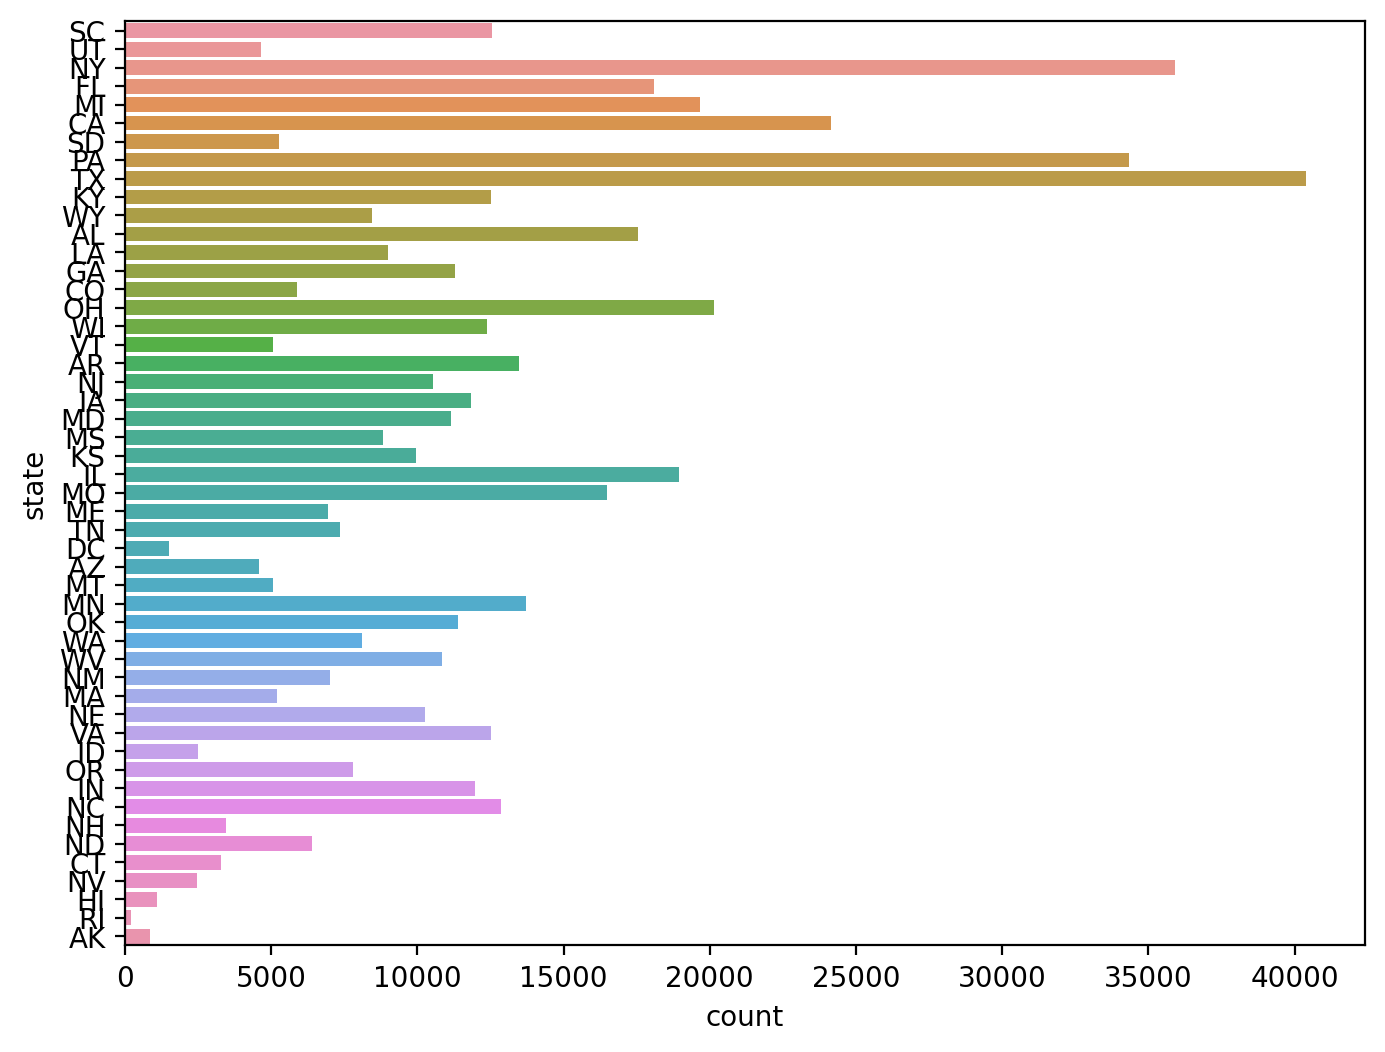

In [32]:
print(Df['state'].value_counts())
plt.figure(figsize=(8,6),dpi=200)
sns.countplot(y = "state" , data = Df)

#### 6) city

In [33]:
Df['city'].value_counts()

Birmingham     2423
Meridian       2229
Phoenix        2222
Utica          2204
San Antonio    2182
               ... 
Senatobia        10
Seattle           9
Guthrie           9
Rice              8
Wever             6
Name: city, Length: 849, dtype: int64

#### 7) zip

NOTE: As this variable is not useful in building the model, we will not use this variable for data building.

And hence variable exploration is not necessary.



#### 8) dob

In [34]:
Df['dob'].value_counts()

23-03-1977    2408
15-09-1988    1951
29-08-1981    1935
22-09-1997    1474
05-07-1997    1466
              ... 
23-12-1936       9
08-11-1969       9
30-05-1944       8
09-05-1932       7
02-08-1998       6
Name: dob, Length: 910, dtype: int64

In [35]:
# To predict customer frauds, 'dob' doesn't play any role that whether there will be a fraud with customer or not, so we can remove that column too. as it is not necessary.
# It is not useful in building the model , so it is better to drop this variable.

#Df = Df.drop("dob",1)


#### 8) gender

In [36]:
# To check whether how many males and how many females are there.
Df['gender'].value_counts()

F    304886
M    250833
Name: gender, dtype: int64

**There are total 250833 males and 304886 females**

#### 9) job

In [37]:
Df['job'].value_counts()

Film/video editor                4119
Exhibition designer              3968
Surveyor, land/geomatics         3756
Naval architect                  3750
Designer, ceramics/pottery       3463
                                 ... 
Estate manager/land agent         195
Engineer, civil (consulting)      194
Operational investment banker      11
Software engineer                  11
Engineer, water                     8
Name: job, Length: 478, dtype: int64

#### 10) is_fraud

In [38]:
Df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

**That means there are total 553574 transactions are normal and 2145 transactions are fraudelent**

Initially in the dataset 'gender' is in the object form so we cannot fit a model with object variable, So need to be convert into numerical feature.

In [39]:
Df['gender']=Df['gender'].apply(lambda x: 1 if x=="M" else 0)
Df['gender'].value_counts()

0    304886
1    250833
Name: gender, dtype: int64

In [40]:
# TO see the Updated Dataset
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,...,1371816865,33.986391,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,...,1371816873,39.450498,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,1371816893,40.495810,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,1371816915,28.812398,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,1371816917,44.959148,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00


## 3) Continous Variable Explorration

**To Explore Continouse Variable we can use**


1.   Quantile function
2.   Boxplot

1) Quantile Function : takes an array and a number say q between 0 and 1.

2) Boxplot : A boxplot is a standardized way of displaying the dataset based on the five-number summary: the minimum, the maximum, the sample median, and the first and third quartiles.



In [41]:
Df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'street', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'dob', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud', 'time', 'hour_of_day',
       'trans_year', 'trans_month', 'trans_Date', 'trans_time'],
      dtype='object')

sometimes distance from the customer's home location to the merchant's location can prove out to be main reason for fraud, so taking the
**difference of longitude and lattitude of respective columns**

In [42]:
Df["lat_diff"] = abs(Df.lat - Df.merch_lat)
Df["long_diff"] = abs(Df["long"] - Df["merch_long"])

In [43]:
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,merch_long,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,lat_diff,long_diff
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,...,-81.200714,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00,0.020491,0.265214
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,...,-109.960431,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00,0.870202,0.475569
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,-74.196111,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00,0.177090,0.659611
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,-80.883061,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00,0.242698,0.063961
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,-85.884734,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00,0.706248,0.867734


In [44]:
# So ,now  we have the difference i.e. lat_diff & long_diff ,As we know that difference between each degree of longitude and lattitude is 69 miles(approx) i.e 110 Kilometers.
# So taking displacement into account as it will be difficult to calculate distance between merchant's location
# or customer's location so applying pythogoras theorem

Df["displacement"] = np.sqrt(pow((Df["lat_diff"]*110),2) + pow((Df["long_diff"]*110),2))

# here we have applied pythogoras theorem and we have multiplied with 110 because each degree of longitude and lattitude is 69 miles(approx).

In [45]:
Df.head()

,cc_num,merchant,category,amt,gender,street,city,state,zip,lat,...,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,lat_diff,long_diff,displacement
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,351 Darlene Green,Columbia,SC,29209,33.9659,...,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00,0.020491,0.265214,29.260485
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,3638 Marsh Union,Altonah,UT,84002,40.3207,...,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00,0.870202,0.475569,109.084144
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,9333 Valentine Point,Bellmore,NY,11710,40.6729,...,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00,0.177090,0.659611,75.126661
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,...,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00,0.242698,0.063961,27.608319
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,...,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00,0.706248,0.867734,123.069725


In [46]:
# now since we got the displacement so longitudes and lattitudes columns are of no use now, so we can remove them
Df = Df.drop(columns = ["lat","long","merch_lat","merch_long","lat_diff","long_diff"])

In [47]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   cc_num        555719 non-null  float64       
 1   merchant      555719 non-null  object        
 2   category      555719 non-null  object        
 3   amt           555719 non-null  float64       
 4   gender        555719 non-null  int64         
 5   street        555719 non-null  object        
 6   city          555719 non-null  object        
 7   state         555719 non-null  object        
 8   zip           555719 non-null  int64         
 9   city_pop      555719 non-null  int64         
 10  job           555719 non-null  object        
 11  dob           555719 non-null  object        
 12  unix_time     555719 non-null  int64         
 13  is_fraud      555719 non-null  int64         
 14  time          555719 non-null  datetime64[ns]
 15  hour_of_day   555

In [48]:
# since state contains both city and zip code and street comes under city, so we can move with state column and drop street, city and zip
# we can work with cities through their population parameter, as names of cities cannot implement whether a fraud will be done or not, while
# population of a city can.
Df = Df.drop(columns = ["city","zip","street"])
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   cc_num        555719 non-null  float64       
 1   merchant      555719 non-null  object        
 2   category      555719 non-null  object        
 3   amt           555719 non-null  float64       
 4   gender        555719 non-null  int64         
 5   state         555719 non-null  object        
 6   city_pop      555719 non-null  int64         
 7   job           555719 non-null  object        
 8   dob           555719 non-null  object        
 9   unix_time     555719 non-null  int64         
 10  is_fraud      555719 non-null  int64         
 11  time          555719 non-null  datetime64[ns]
 12  hour_of_day   555719 non-null  int64         
 13  trans_year    555719 non-null  int64         
 14  trans_month   555719 non-null  int64         
 15  trans_Date    555

#### 1) **amt**

In [49]:
Df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

In [50]:
util_percentiles=Df['amt'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles,2)

0.100        4.08
0.250        9.63
0.500       47.29
0.750       83.01
0.800       94.40
0.900      135.55
0.910      142.38
0.920      150.93
0.930      162.74
0.940      177.45
0.950      193.05
0.960      210.08
0.970      238.74
0.980      320.49
0.990      519.85
0.995      787.16
1.000    22768.11
Name: amt, dtype: float64

<Axes: >

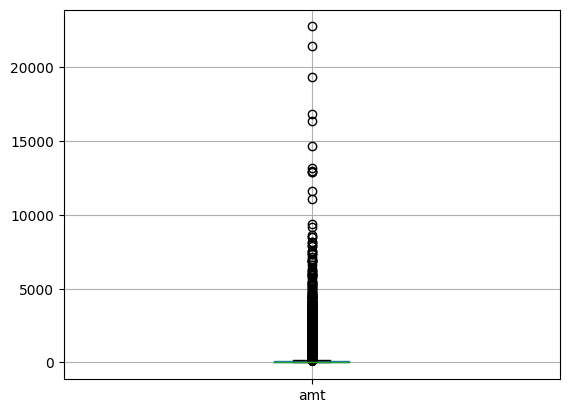

In [51]:
Df.boxplot(column='amt')

There are lot of outliers. need to be clean

In [52]:
Df['is_fraud'].value_counts()

0    553574
1      2145
Name: is_fraud, dtype: int64

0- Normal Transactions


1- Normal Transaction

In [53]:
Df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

In [54]:
Percentiles = Df['amt'].quantile([0.10,0.25,0.5,0.75,0.80,0.90,0.91,0.92,0.93,0.94,0.96,0.97,0.98,0.99,1.0])
Percentiles

0.10        4.0800
0.25        9.6300
0.50       47.2900
0.75       83.0100
0.80       94.4000
0.90      135.5500
0.91      142.3800
0.92      150.9300
0.93      162.7374
0.94      177.4500
0.96      210.0800
0.97      238.7400
0.98      320.4864
0.99      519.8546
1.00    22768.1100
Name: amt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7972362b2e30>,
 'caps': [<matplotlib.lines.Line2D at 0x7972362b3370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7972362b2b90>],
 'medians': [<matplotlib.lines.Line2D at 0x7972362b38b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7972362b3b50>],
 'means': []}

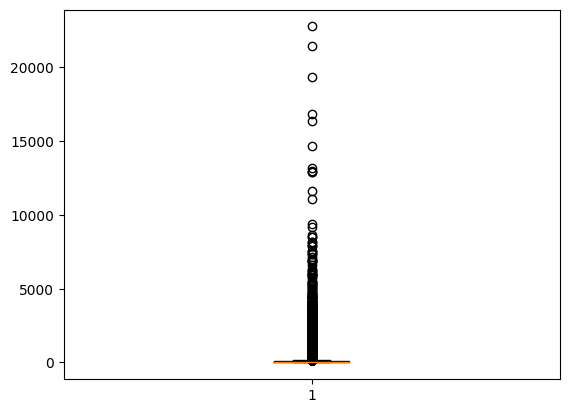

In [55]:
plt.boxplot(Df["amt"])

**We can see that fraud transactions are very very less as compare to the normal ones.**

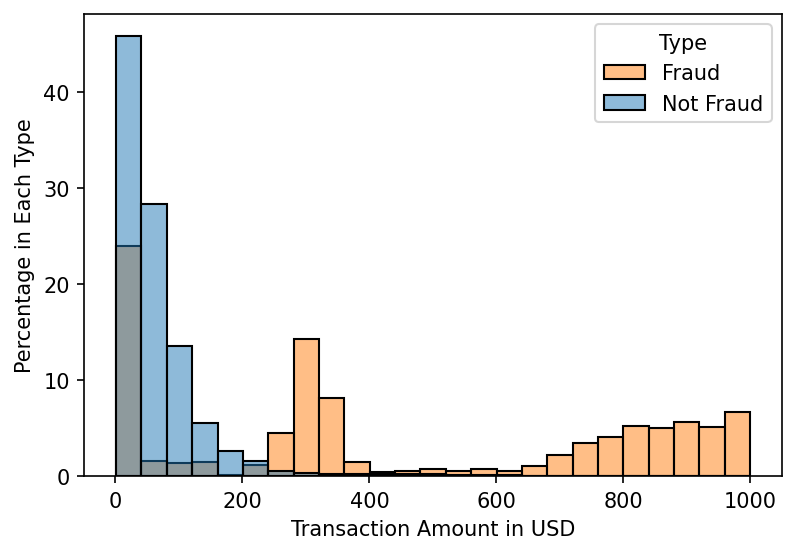

In [56]:
#amount vs fraud
plt.figure(figsize=(6,4),dpi=150)
ax=sns.histplot(x='amt',data=Df[Df.amt<=1000],hue='is_fraud',stat='percent',common_norm=False,bins=25)
ax.set_ylabel('Percentage in Each Type')
ax.set_xlabel('Transaction Amount in USD')
plt.legend(title='Type', labels=['Fraud', 'Not Fraud'])

**Observation** :-The result is very interesting! While normal transactions tend to be around    \$200  or less, we can see fraudulent transactions peak around \$300 and then at the $800-\$1000 range.

<ipython-input-57-76452dfff7cf>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plots.append(sns.histplot(Df[Df.amt <= 1000].amt, bins=50, ax=plt.subplot(234),color='skyblue'))


Text(0, 0.5, 'Number of transactions')

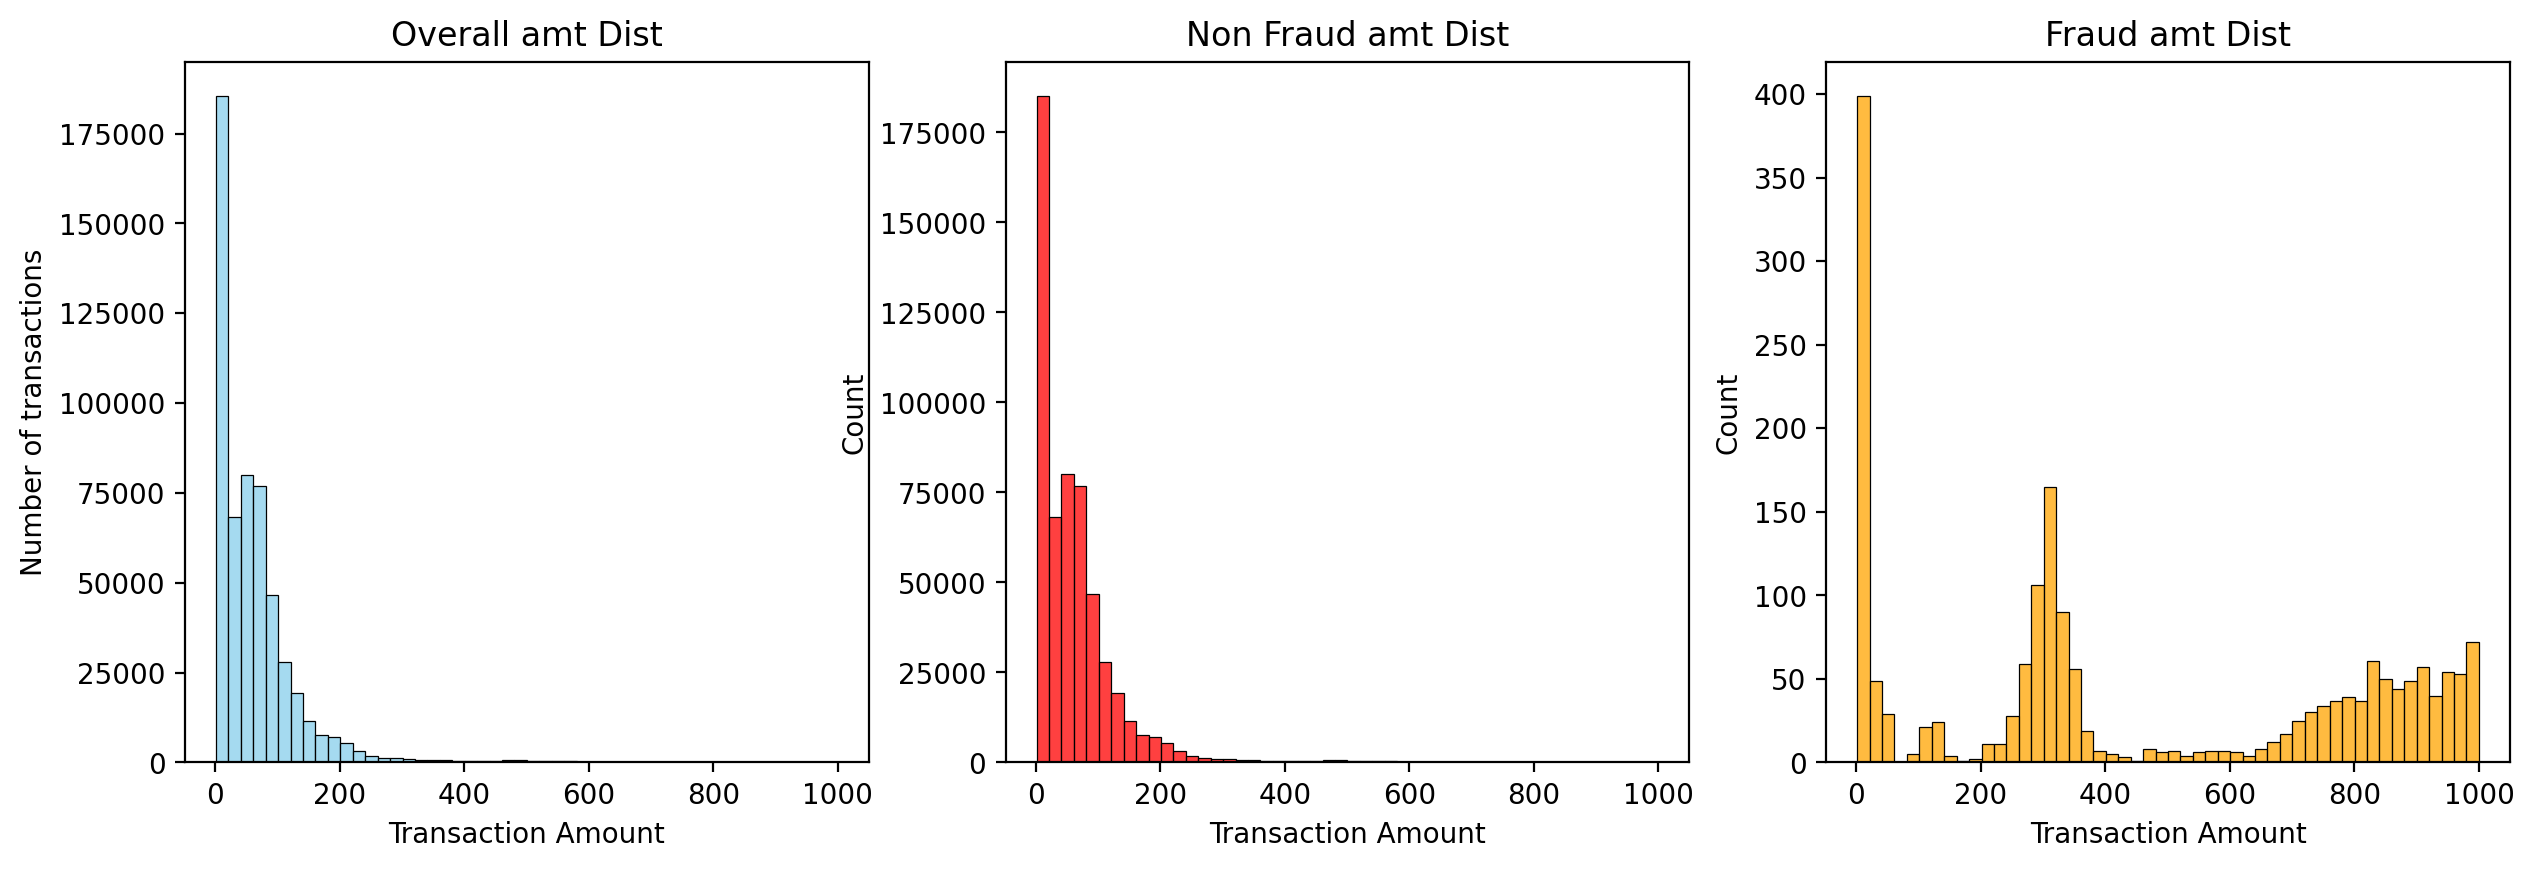

In [57]:
fig = plt.subplots(figsize=(15,10),dpi=200)
plots = []

plots.append(sns.histplot(Df[Df.amt <= 1000].amt, bins=50, ax=plt.subplot(234),color='skyblue'))
plots.append(sns.histplot(Df[(Df.is_fraud==0) & (Df.amt<=1000)].amt, bins=50, ax=plt.subplot(235),color='red'))
plots.append(sns.histplot(Df[(Df.is_fraud==1) & (Df.amt<=1000)].amt, bins=50, ax=plt.subplot(236),color='orange'))

#setting titles
plots[0].set_title('Overall amt Dist')
plots[1].set_title('Non Fraud amt Dist')
plots[2].set_title('Fraud amt Dist')

#setting x labels
plots[0].set_xlabel('Transaction Amount')
plots[1].set_xlabel('Transaction Amount')
plots[2].set_xlabel('Transaction Amount')

#setting y label
plots[0].set_ylabel('Number of transactions')

**Create new column as age by subtracting dob from todays date**
To get todays there is function called datetime.date.today()

In [58]:
import datetime as dt
Df['age']=dt.date.today().year-pd.to_datetime(Df['dob']).dt.year

<ipython-input-58-1bcc528915ea>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Df['age']=dt.date.today().year-pd.to_datetime(Df['dob']).dt.year


In [59]:
Df.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,dob,unix_time,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,displacement,age
0,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,1,SC,333497,Mechanical engineer,19-03-1968,1371816865,0,2013-06-21 12:14:25,12,2020,6,21,12:14:00,29.260485,55
1,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,0,UT,302,"Sales professional, IT",17-01-1990,1371816873,0,2013-06-21 12:14:33,12,2020,6,21,12:14:00,109.084144,33
2,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,0,NY,34496,"Librarian, public",21-10-1970,1371816893,0,2013-06-21 12:14:53,12,2020,6,21,12:14:00,75.126661,53
3,3.591920e+15,fraud_Haley Group,misc_pos,60.05,1,FL,54767,Set designer,25-07-1987,1371816915,0,2013-06-21 12:15:15,12,2020,6,21,12:15:00,27.608319,36
4,3.526830e+15,fraud_Johnston-Casper,travel,3.19,1,MI,1126,Furniture designer,06-07-1955,1371816917,0,2013-06-21 12:15:17,12,2020,6,21,12:15:00,123.069725,68


<Axes: xlabel='age', ylabel='Density'>

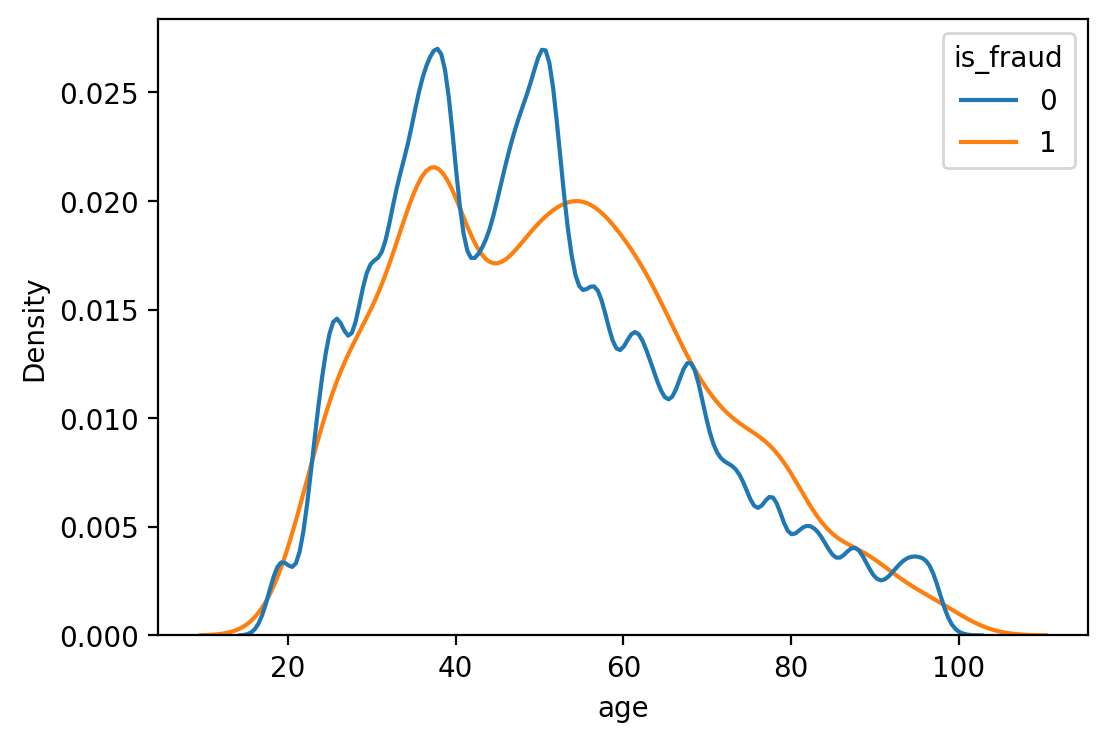

In [60]:
plt.figure(figsize=(6,4),dpi=200)
sns.kdeplot(data=Df,x='age',hue='is_fraud',common_norm=False)

**Observation** :- From the graph we can see that most of the fraud transactions are done by 30-60 age group.

In [61]:
# number of fraud transactions per gender.
sns.countplot(Df[Df["is_fraud"]==1]["gender"])

KeyError: ignored

**Observation** :- There are more Fraud transactions are done by females.nearly about 1200 fraud transactions are done by females and around 1000 fraud transactions are done by males.

<Axes: xlabel='hour_of_day', ylabel='count'>

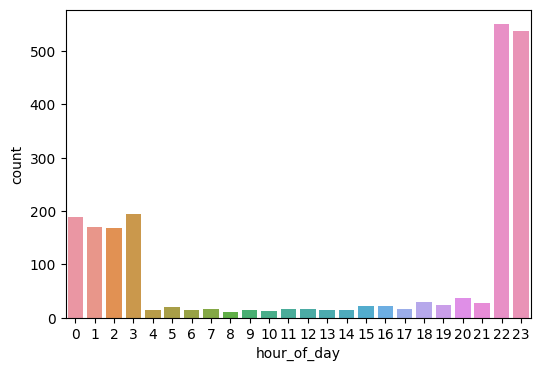

In [63]:
#Plotting fraud transactions with respect to the hour of day
plt.figure(figsize=(6,4),dpi=100)
sns.countplot(x="hour_of_day",data=Df[Df["is_fraud"]==1])

**Observation** :- From the Graph we can see that mostly fraud transactions are done in midnight around 22 hour to 24 hour of the day then in between 0 to 4 hr.In daytime fraud transactions are very less in number.

From this we can conclude that most of the fraud transactions happened during midnight.

In [64]:
#Creating a dataframe consisting of state wise fraud transactions
df1 = Df.groupby(by="state").sum()["is_fraud"].to_frame()
df1.reset_index(inplace=True)
df1 = df1.rename(columns = {"state":"State","is_fraud":"Fraudulent Transactions"})
df1.head()

<ipython-input-64-93dbd19d1292>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = Df.groupby(by="state").sum()["is_fraud"].to_frame()


,State,Fraudulent Transactions
0,AK,14
1,AL,63
2,AR,34
3,AZ,27
4,CA,76


These are the count of the fraud transactions in each states

# Task 3:-  Data Cleaning and Data Preparation

Write down Outlier treatment and missing value treatment code

In [65]:
Df['amt'].describe()

count    555719.000000
mean         69.392810
std         156.745941
min           1.000000
25%           9.630000
50%          47.290000
75%          83.010000
max       22768.110000
Name: amt, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x797231649de0>,
 'caps': [<matplotlib.lines.Line2D at 0x79723164a320>,
 'boxes': [<matplotlib.lines.Line2D at 0x797231649c60>],
 'medians': [<matplotlib.lines.Line2D at 0x79723164a860>],
 'fliers': [<matplotlib.lines.Line2D at 0x79723164ab00>],
 'means': []}

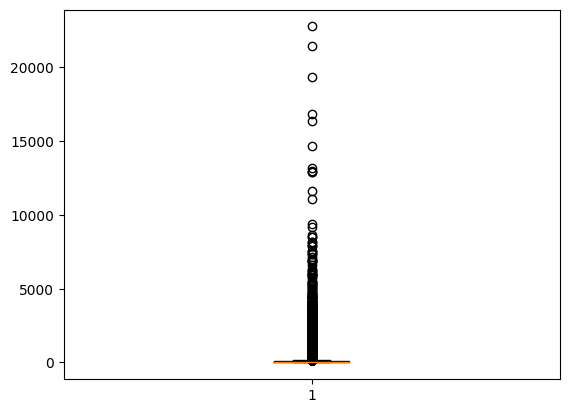

In [66]:
plt.boxplot(Df['amt'])

**Observation:-**  From the boxplot we can see that there are lot of outliers in the "amt". need to treat them

In [67]:
util_percentiles=Df['amt'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles,2)

0.100        4.08
0.250        9.63
0.500       47.29
0.750       83.01
0.800       94.40
0.900      135.55
0.910      142.38
0.920      150.93
0.930      162.74
0.940      177.45
0.950      193.05
0.960      210.08
0.970      238.74
0.980      320.49
0.990      519.85
0.995      787.16
1.000    22768.11
Name: amt, dtype: float64

**Observation:-**From the quantile function we are able to understand that most of the data is clean around 99.5% of the data. 99.5% of the data is below 787.16$

In [68]:
(Df['amt']>1000).sum()

1583

In [69]:
(Df['amt']<1000).sum()

554136

**Observation:-**If we see that most of the data that is 554136 entries are below 1000$ and only 1583 is above 1000 so we can treat them as outliers. 1583 is less than 1% of the data . So , We can change them with median.

In [70]:
Df['amt'].median()

47.29

In [71]:
Df['amt1']=Df['amt']
Df['amt1'][Df['amt']>1000]=Df['amt'].median()
round(Df['amt1'].describe())

<ipython-input-71-89ec1a192945>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Df['amt1'][Df['amt']>1000]=Df['amt'].median()


count    555719.0
mean         64.0
std          85.0
min           1.0
25%          10.0
50%          47.0
75%          82.0
max        1000.0
Name: amt1, dtype: float64

In [72]:
util_percentiles=Df['amt1'].quantile([0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99,0.995,1.00])
round(util_percentiles,2)

0.100      4.08
0.250      9.63
0.500     47.29
0.750     82.46
0.800     93.67
0.900    133.89
0.910    140.25
0.920    148.24
0.930    158.96
0.940    173.24
0.950    188.66
0.960    204.81
0.970    227.71
0.980    289.91
0.990    461.31
0.995    584.89
1.000    999.69
Name: amt1, dtype: float64

# Task 4:-  Model Building


1) Linear Regreesion is not a suitable choice for the given data.

2) As we know that for a given dataset output is classification it is not continouse so we should use Logistic Regression here to get the good accuracy.

The Classification algorithm is a Supervised Learning technique that is used to identify the category of new observations on the basis of training data. In Classification, a program learns from the given dataset or observations and then classifies new observation into a number of classes or groups.

So here we will use two classification algorithm:


1.   Logistic Regression
2.   Decision Tree



## **1)Logistic Regression**

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
logistic= LogisticRegression()
results = logistic.fit(Df[["amt1"]+['displacement']+['hour_of_day']+['city_pop']+['gender']+['trans_month']+['trans_Date']+['trans_year']+['age']],Df[['is_fraud']])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
logistic.intercept_

array([-1.61980732e-06])

In [76]:
logistic.coef_

array([[ 7.22317091e-03, -1.28165432e-04,  7.84530331e-06,
        -4.62274403e-07, -5.93555751e-07, -2.36420070e-05,
        -5.57704480e-05, -3.27201077e-03, -3.99948579e-05]])

#### Model Validation
Confusion matrix, Sensitivity, Specificity, F1 Score, Recall, Precision etc.

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

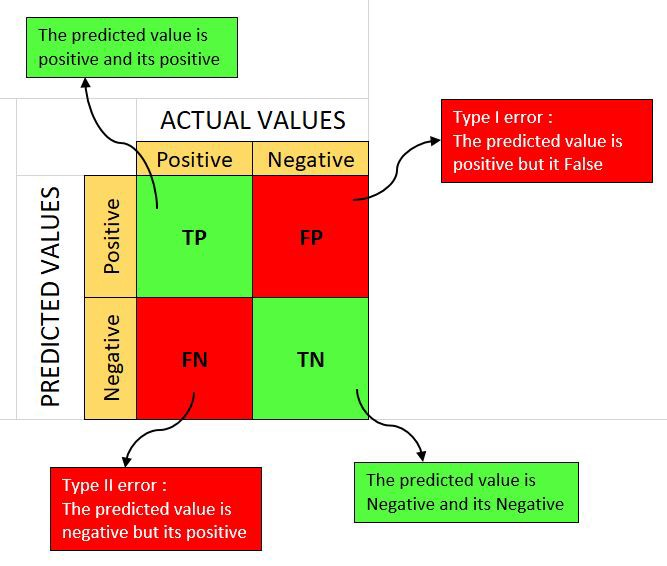

Since we need to find accuracy of the model , we will have to find confusion matrix.

True Positive (TN) = [1,1]
True Negative (TN) = [0,0]
False Negative (FN) = [1,0]
False Positive (FP) = [0,1]



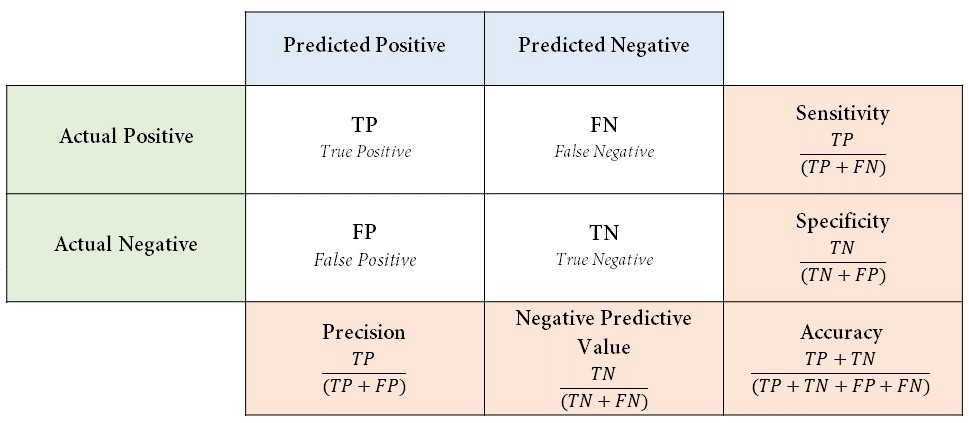

1) **Accuracy**:It is calculated by dividing the total number of correct predictions by all the predictions.

2) **Recall**: The recall is the measure to check correctly positive predicted outcomes out of the total number of positive outcomes.

3)**Precision**:Precision checks how many outcomes are actually positive outcomes out of the total positively predicted outcomes.

4)**F1 score**: is a number between 0 and 1 and is the harmonic mean of precision and recall.

5)**Sensitivity**: is calculated as the number of correct positive predictions divided by the total number of positives.

6)**Specificity**: is calculated as the number of correct negative predictions divided by the total number of negatives.

In [78]:
predict1=logistic.predict(Df[["amt1"]+['displacement']+['hour_of_day']+['city_pop']+['gender']+['trans_month']+['trans_Date']+['trans_year']+['age']])
predict1

cm1 = confusion_matrix(Df[['is_fraud']],predict1)
print(cm1)

[[553391    183]
 [  1930    215]]


In [79]:
print("col sums", sum(cm1))
total1=sum(sum(cm1))
print("Total", total1)


col sums [555321    398]
Total 555719


In [80]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

0.9961977186311787

**Observations:-**By Looking at the accuracy of the logistic regression we can conclude that model is overfitted.

In [81]:
Df['is_fraud']

0         0
1         0
2         0
3         0
4         0
         ..
555714    0
555715    0
555716    0
555717    0
555718    0
Name: is_fraud, Length: 555719, dtype: int64

#### Individual Impact of Variable

In [82]:
import statsmodels.api as sm
m1=sm.Logit(Df['is_fraud'],Df[["amt1"]+["displacement"]+['hour_of_day']+['city_pop']+['gender']+['trans_month']+['trans_Date']+['trans_year']+['age']])
m1.fit()
print(m1.fit().summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555710
Method:                           MLE   Df Model:                            8
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.2601
Time:                        04:39:21   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------


**Observations:-** We can see that "displacement" & "gender" are non impactful variables , by looking at their P value . for impactful variable p value sholud be less than 0.05

Now We will build a Logistic regression model such that it includes only impactful variables.

In [83]:
m2=sm.Logit(Df['is_fraud'],Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['trans_year']+['age']])
m2.fit()
print(m2.fit().summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555712
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.2601
Time:                        04:39:28   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
am

In [84]:
# Defining user defined function for Variation Inflation Factor
def vif_cal(input_data,dependent_col):
  import statsmodels.formula.api as sm
  x_vars=input_data.drop([dependent_col], axis=1)
  xvar_names=x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
    vif=round(1/(1-rsq),2)
    print (xvar_names[i], " VIF = " , vif)

In [85]:

features_1= ["amt1",'hour_of_day','city_pop','trans_Date','trans_month','trans_year','age','is_fraud']
print("Features",features_1)

X_1 = Df[features_1]
print("X shape", X_1.shape)
y_1= Df['is_fraud']
print("Y shape", y_1.shape)

Features ['amt1', 'hour_of_day', 'city_pop', 'trans_Date', 'trans_month', 'trans_year', 'age', 'is_fraud']
X shape (555719, 8)
Y shape (555719,)


In [86]:
vif_cal(X_1,'is_fraud')

amt1  VIF =  1.01
hour_of_day  VIF =  1.04
city_pop  VIF =  1.01
trans_Date  VIF =  1.01
trans_month  VIF =  1.01


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1781: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


trans_year  VIF =  0.0
age  VIF =  1.04


**Observations:-**Now see that all variables are impactful in the model.

In [87]:
logistic2= LogisticRegression()
results = logistic2.fit(Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['trans_year']+['age']],Df[['is_fraud']])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [88]:
predict1=logistic2.predict(Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['trans_year']+['age']])
predict1

cm1 = confusion_matrix(Df[['is_fraud']],predict1)
print(cm1)

[[553391    183]
 [  1929    216]]


In [89]:
accuracy1=(cm1[0,0]+cm1[1,1])/total1
accuracy1

0.9961995181017744

## **2)Decision Tree Model**

The aim is to divide the whole population or the data set into segments.<br>
The segmentation need to be useful for business decision making.
If one class is really dominating in a segments, Then it will be easy for us to classify the unknown items, Then its very easy for applying business strategy.<br>

One advantage of decision tree is easy to interpret and fast. means, we can seee which variable is entering and all
Accuracy is low as compare to some other models.

In [90]:
from sklearn import tree

features= ["amt1",'displacement','hour_of_day','city_pop','gender','trans_Date','trans_month','trans_year','age']
print("Features",features)

X = Df[features]
print("X shape", X.shape)
y = Df['is_fraud']
print("Y shape", y.shape)

Features ['amt1', 'displacement', 'hour_of_day', 'city_pop', 'gender', 'trans_Date', 'trans_month', 'trans_year', 'age']
X shape (555719, 9)
Y shape (555719,)


|--- amt1 <= 710.11
|   |--- amt1 <= 269.01
|   |   |--- hour_of_day <= 21.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  21.50
|   |   |   |--- class: 0
|   |--- amt1 >  269.01
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 0
|--- amt1 >  710.11
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 0
|   |--- hour_of_day >  21.50
|   |   |--- age <= 52.50
|   |   |   |--- class: 1
|   |   |--- age >  52.50
|   |   |   |--- class: 1



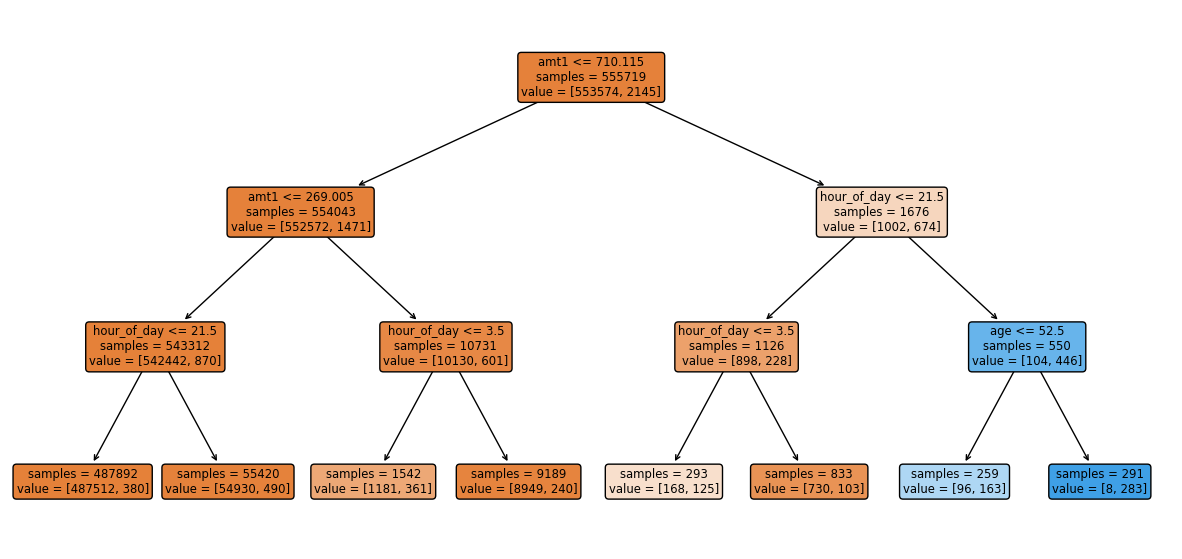

In [91]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(X,y)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

#### Model Validation

In [92]:
#Tree Validation
predict1 = DTree.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predict1)
print (cm)

total = sum(sum(cm))
# Calculate Accouracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[553470    104]
 [  1699    446]]
0.9967555545158614


**This is a overfitting problem**

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [95]:
#training Tree Model
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print(cm1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[442867      0]
 [     0   1708]]
Train Accuracy 1.0
[[110453    254]
 [   197    240]]
Test Accuracy 0.9959422011084719


We can see that model is overfitted it is due to imbalanced data.

#### **Pruning**

In [96]:
#training Tree Model
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
print(cm1)
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[442757    110]
 [  1168    540]]
Train Accuracy 0.9971253444300736
[[110681     26]
 [   288    149]]
Test Accuracy 0.9971748362484705


|--- amt1 <= 710.11
|   |--- amt1 <= 269.01
|   |   |--- hour_of_day <= 21.50
|   |   |   |--- hour_of_day <= 3.50
|   |   |   |   |--- amt1 <= 23.70
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  23.70
|   |   |   |   |   |--- class: 0
|   |   |   |--- hour_of_day >  3.50
|   |   |   |   |--- amt1 <= 229.82
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  229.82
|   |   |   |   |   |--- class: 0
|   |   |--- hour_of_day >  21.50
|   |   |   |--- amt1 <= 249.23
|   |   |   |   |--- amt1 <= 16.31
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  16.31
|   |   |   |   |   |--- class: 0
|   |   |   |--- amt1 >  249.23
|   |   |   |   |--- amt1 <= 249.43
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- amt1 >  249.43
|   |   |   |   |   |--- class: 0
|   |--- amt1 >  269.01
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- amt1 <= 355.14
|   |   |   |   |--- age <= 29.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- age >  29.50
|  

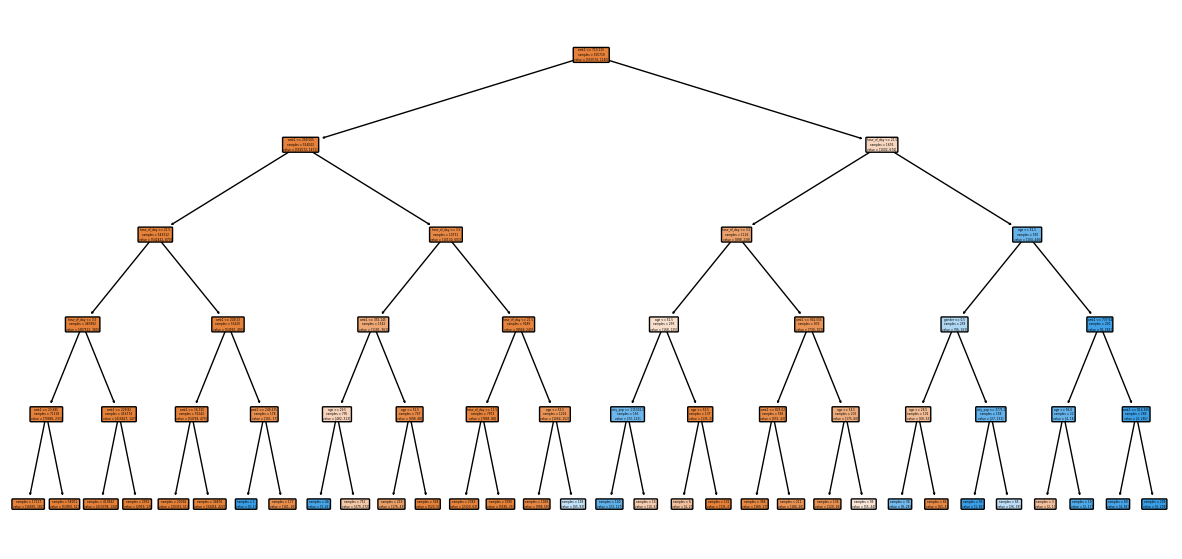

In [97]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=5)
DTree.fit(X,y)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

# Task 5 :- Model Validation metrics calculation

## 1) **Sensitivity & Specificity**

**Sensitivity:-** The percentage of positives that are successfully classified as positive.

**Sensitivity = (True Positives)/(True Positives + False Negatives)**

**Specificity:-** Percentage of negatives that are successfully classified as negative.




**Specificity=(True Negatives)/(True Negatives + False Positives)**


In [98]:
import statsmodels.formula.api as sm

In [99]:
model = sm.logit(formula='is_fraud ~ amt1+city_pop+hour_of_day+trans_Date+trans_month+trans_year+age', data=Df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555711
Method:                           MLE   Df Model:                            7
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.2601
Time:                        04:39:50   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.957e-06        nan        nan        nan         nan         nan
amt1            0.0072   

In [100]:
model = sm.logit(formula='is_fraud ~ amt1+city_pop+hour_of_day+trans_Date+trans_month+age', data=Df)
results = model.fit()
print(results.summary())

Optimization terminated successfully.
         Current function value: 0.018722
         Iterations 10
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               555719
Model:                          Logit   Df Residuals:                   555712
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.2601
Time:                        04:39:56   Log-Likelihood:                -10404.
converged:                       True   LL-Null:                       -14061.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -6.0872      0.156    -39.075      0.000      -6.393      -5.782
amt1            0.0072   

**Observations:-**Now we can see that all the avriables in the logistic model are impactful , by checking their P value.

In [101]:
predictions = results.predict()
print(predictions[0:10])
len(predictions)

[0.00154759 0.00175997 0.00227174 0.00219654 0.00201884 0.00161935
 0.00534387 0.0018125  0.0017175  0.00315002]


555719

In [102]:
#Converting predicted values into classes using threshold
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Now , Find overall model accuracy , sensitivity and specificity

In [103]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(Df["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[553404    170]
 [  1874    271]]
Accuracy :  0.9963218821022856
Sensitivity :  0.9996929046523139
Specificity :  0.12634032634032635


**Observations:-**Sensitivity is very high but as specificity is very less  that means accuracy of identifying fraud transactions by the model is very less . To improve Specificity adjust the threshold value.

In [104]:
#Sensitivity vs Specificity with Different Thresholds
#Converting predicted values into classes using new threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(Df["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[552714    860]
 [  1503    642]]
Accuracy :  0.9957478509822411
Sensitivity :  0.9984464588293526
Specificity :  0.2993006993006993


**Observation:-**By adjusting threshold=0.2 we are geeting specificity value is 0.3048 that means some improvement is there.

## 2) **Precision, Recall & F1 Score**

In [105]:
predictions = results.predict()
### Converting predicted values into classes using threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]

cm1 = confusion_matrix(Df["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )

Confusion Matrix : 
 [[552714    860]
 [  1503    642]]
Accuracy :  0.9957478509822411
Precision_Class0 :  0.9972880658658972
Recall_Class0 :  0.9984464588293526
F1_Class0 :  0.9978669261620647
Precision_Class1 :  0.4274300932090546
Recall_Class1 :  0.2993006993006993
F1_Class1 :  0.3520701946805594


We can simulate all these thing by inbuilt function in sklearn.metrics  that is classification_report

In [106]:
# By direct package
from sklearn.metrics import classification_report
print(classification_report(Df["is_fraud"],predicted_class1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.43      0.30      0.35      2145

    accuracy                           1.00    555719
   macro avg       0.71      0.65      0.67    555719
weighted avg       1.00      1.00      1.00    555719



# Task 6:-  **Handling Class Imbalance**

In [107]:
print("Actual Data :", Df.shape)

#Frequency count on target column
freq=Df['is_fraud'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
credit_card_normal_class0 = Df[Df['is_fraud'] == 0]
credit_card_fraud_class1 = Df[Df['is_fraud'] == 1]

print("Class0 Actual :", credit_card_normal_class0.shape)
print("Class1 Actual  :", credit_card_fraud_class1.shape)


Actual Data : (555719, 20)
0    553574
1      2145
Name: is_fraud, dtype: int64
0    99.614014
1     0.385986
Name: is_fraud, dtype: float64
Class0 Actual : (553574, 20)
Class1 Actual  : (2145, 20)


**Observations:-** We can see that this data is very imbalanced , means proportion of normal transactions is very high as compare to fraud transactions.

**Observations:-** Only about 0.38 percent data is for fraud transactions. which is very less. Thats why need to oversampling.

####  **Undersampling & Oversampling**

Oversampling means Duplicating samples from the minority class means the class .In this class the model may not be able to learn pattern for the class with negligible entries.<br>

Undersampling Means Deleting samples from the majority class.<br>

Here, oversampled fraud transactions data is from 0.38\% to 15\% and undersampled the normal transaction data is about 85\% of the total\\

In [108]:
#Undersampling of class-0
# Consider 0.85 percent of class-0
credit_card_normal_class0_under = credit_card_normal_class0.sample(int(0.85*len(credit_card_normal_class0)))
print("Class0 Undersample :", credit_card_normal_class0_under.shape)

##Oversampling of Class-1
# Lets increase the size by fourty times
credit_card_fraud_class1_over = credit_card_fraud_class1.sample(40*len(credit_card_fraud_class1),replace=True)
print("Class1 Oversample :", credit_card_fraud_class1_over.shape)

#Concatenate to create the final balanced data
credit_card_balanced=pd.concat([credit_card_normal_class0_under,credit_card_fraud_class1_over])
print("Final Balannced Data :", credit_card_balanced.shape)

#Frequency count on target column in the balanced data
freq=credit_card_balanced['is_fraud'].value_counts()
print(freq)
print((freq/freq.sum())*100)


Class0 Undersample : (470537, 20)
Class1 Oversample : (85800, 20)
Final Balannced Data : (556337, 20)
0    470537
1     85800
Name: is_fraud, dtype: int64
0    84.577693
1    15.422307
Name: is_fraud, dtype: float64


**Note:-** Here ,I have oversampled fraud transactions data is about 15% and undersampled the normal transaction data is about 85% of the total

In [109]:
Df.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'city_pop',
       'job', 'dob', 'unix_time', 'is_fraud', 'time', 'hour_of_day',
       'trans_year', 'trans_month', 'trans_Date', 'trans_time', 'displacement',
       'age', 'amt1'],
      dtype='object')

## 1)Logistic Regression

In [110]:
logistic_new= LogisticRegression()
new_results = logistic_new.fit(Df[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['age']],Df[['is_fraud']])


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [111]:
predict3=logistic_new.predict(credit_card_balanced[["amt1"]+['hour_of_day']+['city_pop']+['trans_month']+['trans_Date']+['age']])
predict3

cm3 = confusion_matrix(credit_card_balanced[['is_fraud']],predict3)
print(cm3)

[[470302    235]
 [ 78215   7585]]


In [112]:
total1=sum(sum(cm3))
#from confusion matrix calculate accuracy
accuracy3=(cm3[0,0]+cm3[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity3 = cm3[0,0]/(cm3[0,0]+cm3[0,1])
print('Sensitivity : ', sensitivity1 )

specificity3 = cm3[1,1]/(cm3[1,0]+cm3[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9957478509822411
Sensitivity :  0.9984464588293526
Specificity :  0.2993006993006993


**Observations:-** After oversampling and undersampling, When we apply Logistic regression we get specificity increased upto certain limit

In [113]:
import statsmodels.formula.api as sm
model_new_data = sm.logit(formula='is_fraud ~ amt1+city_pop+hour_of_day+trans_Date+trans_month+age', data=credit_card_balanced)
result_new = model_new_data.fit()
print(result_new.summary())

Optimization terminated successfully.
         Current function value: 0.287935
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               556337
Model:                          Logit   Df Residuals:                   556330
Method:                           MLE   Df Model:                            6
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.3303
Time:                        04:40:04   Log-Likelihood:            -1.6019e+05
converged:                       True   LL-Null:                   -2.3921e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      -1.9184      0.031    -61.838      0.000      -1.979      -1.858
amt1            0.0079   3

In [114]:
predictions = result_new.predict()
print(predictions[0:10])
len(predictions)

[0.04849399 0.04406997 0.11985123 0.05165274 0.13542233 0.06203062
 0.11788536 0.07297336 0.04737848 0.13113294]


556337

In [115]:
### Converting predicted values into classes using threshold
threshold=0.5
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]
print(predicted_class1[0:10])

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [116]:
from sklearn.metrics import confusion_matrix

cm1 = confusion_matrix(credit_card_balanced["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[464567   5970]
 [ 51659  34141]]
Accuracy :  0.8964135047641987
Sensitivity :  0.9873123686341351
Specificity :  0.3979137529137529


After Undersampling and oversampling applied logistic regression then got specificity is about 0.39 .Means Model is identifying  39% fraud transactions

##### Updated Sensitivity & Specificity

In [117]:
#Sensitivity vs Specificity with Different Thresholds
# Converting predicted values into classes using new threshold
threshold=0.2
predicted_class1=[ 0 if x < threshold else 1 for x in predictions]


#Confusion matrix, Accuracy, sensitivity and specificity
cm1 = confusion_matrix(credit_card_balanced["is_fraud"],predicted_class1)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[447657  22880]
 [ 32568  53232]]
Accuracy :  0.9003337904902964
Sensitivity :  0.9513747059211072
Specificity :  0.6204195804195805


**Observations:-** By adjusting threshold = 0.2 we are getting specificity is about 0.61 that is model identifying 61% fraud transactions.

#### Updated Precision, Recall and F1-Score

In [118]:
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

Precision_Class0 = cm1[0,0]/(cm1[0,0]+cm1[1,0])
print('Precision_Class0 : ', Precision_Class0 )

Recall_Class0 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Recall_Class0 : ', Recall_Class0 )

F1_Class0 = 2/((1/Precision_Class0)+(1/Recall_Class0))
print('F1_Class0 : ', F1_Class0 )


Precision_Class1 = cm1[1,1]/(cm1[0,1]+cm1[1,1])
print('Precision_Class1 : ', Precision_Class1 )

Recall_Class1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Recall_Class1 : ', Recall_Class1 )

F1_Class1 = 2/((1/Precision_Class1)+(1/Recall_Class1))
print('F1_Class1 : ', F1_Class1 )

Accuracy :  0.9003337904902964
Precision_Class0 :  0.9321817897860378
Recall_Class0 :  0.9513747059211072
F1_Class0 :  0.9416804626184051
Precision_Class1 :  0.6993903720832457
Recall_Class1 :  0.6204195804195805
F1_Class1 :  0.6575423686941054


In [119]:
from sklearn.metrics import classification_report
print(classification_report(credit_card_balanced["is_fraud"],predicted_class1))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94    470537
           1       0.70      0.62      0.66     85800

    accuracy                           0.90    556337
   macro avg       0.82      0.79      0.80    556337
weighted avg       0.90      0.90      0.90    556337



**Observations:-** We can observe that after handeling the imbalanced data , we getting accuracy for the class 2(Fraud transactions) .i.e. specificity is 0.62 . But before it was to less.

## 2)Decision Tree

Aim of the decision tree is to divide the whole population or data set into segments.

In [120]:
from sklearn import tree

features1= ["amt1",'displacement','hour_of_day','city_pop','gender','trans_Date','trans_month','trans_year','age']
print("Features",features)

X = credit_card_balanced[features1]
print("X shape", X.shape)
y = credit_card_balanced['is_fraud']
print("Y shape", y.shape)

Features ['amt1', 'displacement', 'hour_of_day', 'city_pop', 'gender', 'trans_Date', 'trans_month', 'trans_year', 'age']
X shape (556337, 9)
Y shape (556337,)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

|--- amt1 <= 251.35
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 0
|   |--- hour_of_day >  21.50
|   |   |--- amt1 <= 15.98
|   |   |   |--- class: 0
|   |   |--- amt1 >  15.98
|   |   |   |--- class: 0
|--- amt1 >  251.35
|   |--- amt1 <= 682.24
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 1
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 1
|   |--- amt1 >  682.24
|   |   |--- hour_of_day <= 21.50
|   |   |   |--- class: 1
|   |   |--- hour_of_day >  21.50
|   |   |   |--- class: 1



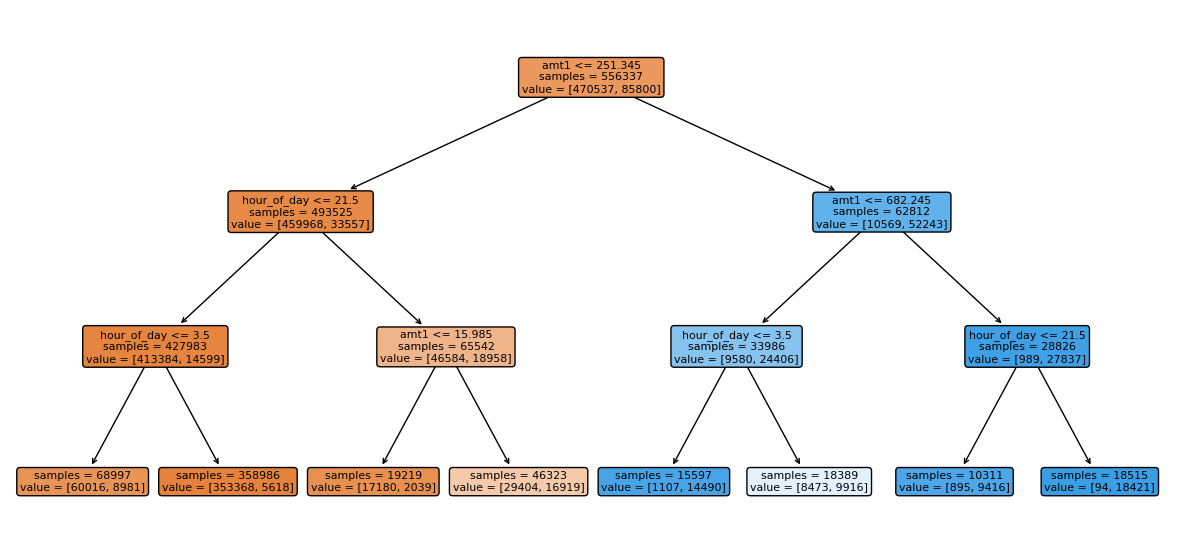

In [122]:
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(X,y)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

In [123]:
#Tree Validation
predict2 = DTree.predict(X)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, predict2)
print (cm)

total = sum(sum(cm))
# Calculate Accouracy
accuracy = (cm[0,0]+cm[1,1])/total
print(accuracy)

[[459968  10569]
 [ 33557  52243]]
0.9206847648098185


In [124]:
from sklearn.model_selection import train_test_split

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [126]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
print(cm1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[376320      0]
 [     0  68749]]
Train Accuracy 1.0
[[94001   216]
 [    0 17051]]
Test Accuracy 0.9980587410576266


#### **Pruning**

Pruning helps us to avoid overfitting .We can avoid overfitting by changing the tuning parameters like 'max_depth' & 'max_leaf_nodes'

In [127]:
clf = tree.DecisionTreeClassifier(max_depth=5)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_train)
predict2 = clf.predict(X_test)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
print(cm1)
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[366825   9495]
 [ 15022  53727]]
Train Accuracy 0.9449141593775348
[[91824  2393]
 [ 3685 13366]]
Test Accuracy 0.9453751303159939


**Note :-** Adjust the pruning parameters till we get the train accuracy nearly equal to the test accuracy. That will be fix the size of the decision tree.

**Note:-** There are two prunning parameters 1) **max_depth** & 2) **max_leaf_nodes**

**Observations:-** In this case if we take **max_depth = 5** that will give train and test accuracy nearly same.

|--- amt1 <= 251.35
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- amt1 <= 23.70
|   |   |   |   |--- amt1 <= 6.96
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  6.96
|   |   |   |   |   |--- class: 1
|   |   |   |--- amt1 >  23.70
|   |   |   |   |--- amt1 <= 47.30
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  47.30
|   |   |   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- amt1 <= 50.59
|   |   |   |   |--- amt1 <= 47.28
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  47.28
|   |   |   |   |   |--- class: 0
|   |   |   |--- amt1 >  50.59
|   |   |   |   |--- amt1 <= 229.82
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- amt1 >  229.82
|   |   |   |   |   |--- class: 0
|   |--- hour_of_day >  21.50
|   |   |--- amt1 <= 15.98
|   |   |   |--- amt1 <= 6.66
|   |   |   |   |--- city_pop <= 187.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- city_pop >  187.00
|   |  

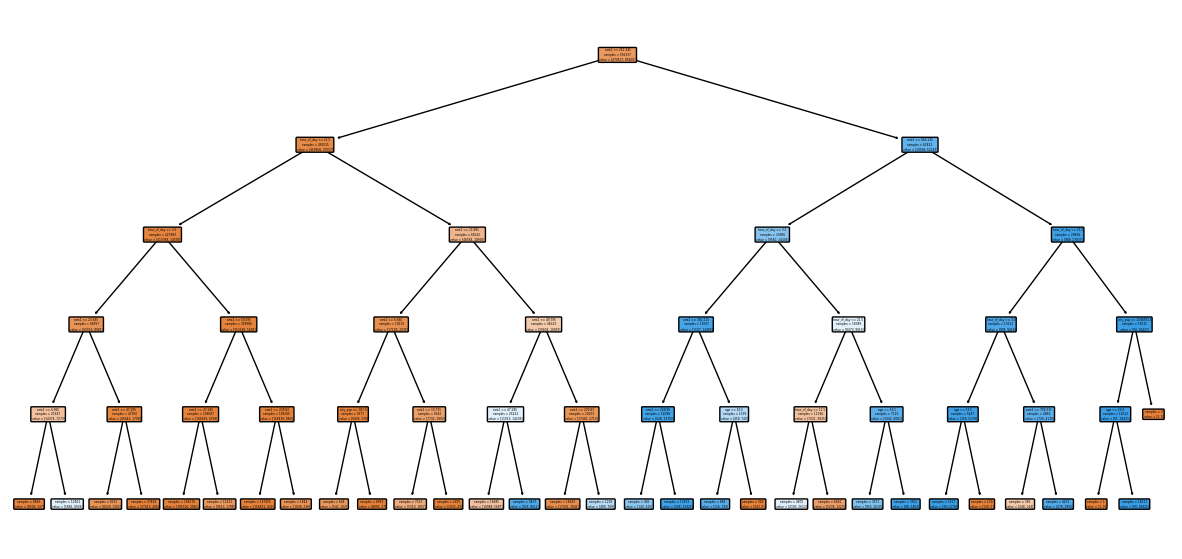

In [128]:
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=5)
DTree.fit(X,y)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

**ROC(Receiver operating characteristics)**

ROC - Receiver operating characteristics curve is drawn by taking false positive root on X-axis and True positive rate on Y-axis.<br>
Roc curve gives us an idea on the performance of model under all possible values of threshold.

In [129]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

actual = credit_card_balanced["is_fraud"]
false_positive_rate, true_positive_rate, thresholds = roc_curve(actual, predictions)
print("false_positive_rate", false_positive_rate)
print("true_positive_rate", true_positive_rate)
print("thresholds", thresholds)

false_positive_rate [0.         0.         0.         ... 0.99613633 0.99613633 1.        ]
true_positive_rate [0.00000000e+00 5.36130536e-04 1.01398601e-03 ... 9.99592075e-01
 1.00000000e+00 1.00000000e+00]
thresholds [1.99676558 0.99676558 0.99637216 ... 0.01932923 0.01932549 0.00656006]


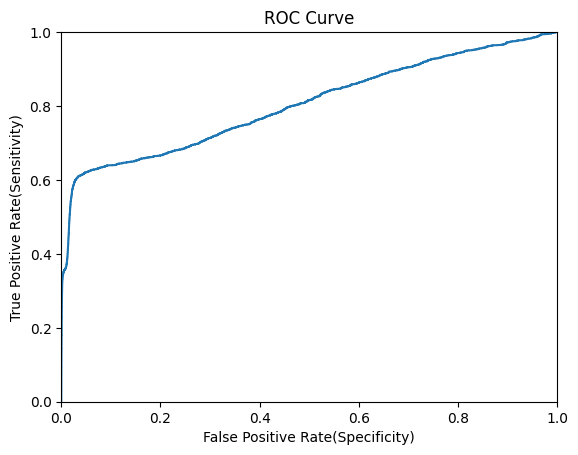

In [130]:
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(false_positive_rate, true_positive_rate)
plt.xlim([-0,1])
plt.ylim([-0,1])
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(Specificity)')
plt.show()

**AUC**

In [131]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.8043085965168606

**Observations:-** We are getting AUC is 0.80 , but for the good model AUC is should be near to 1.

# Task 7:- Feature Engineering

Sometimes the information is hidden columns, we have to extract the hidden patterns and create new columns.

Machine learning algorithm will be able to eaisily find the patterns from these new columns and improve their accuracy

This process of creating new columns is known as feature engineering.

In [132]:
credit_card_balanced.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,dob,unix_time,is_fraud,time,hour_of_day,trans_year,trans_month,trans_Date,trans_time,displacement,age,amt1
333654,4.210080e+18,fraud_Flatley Group,misc_pos,37.47,0,OR,1420,Systems analyst,11-11-1965,1382837161,0,2013-10-27 01:26:01,1,2020,10,27,01:26:00,130.915480,58,37.47
342581,6.762820e+11,"fraud_McLaughlin, Armstrong and Koepp",travel,3.99,0,GA,3430,"Editor, commissioning",25-03-1950,1383225832,0,2013-10-31 13:23:52,13,2020,10,31,13:23:00,135.228230,73,3.99
102041,3.564840e+15,fraud_Pacocha-O'Reilly,grocery_pos,110.65,1,CA,198,Armed forces training and education officer,31-03-1959,1374887493,0,2013-07-27 01:11:33,1,2020,7,27,01:11:00,104.719773,64,110.65
330715,4.800400e+15,fraud_Medhurst PLC,shopping_net,4.54,1,NE,1063,Research scientist (maths),02-04-1928,1382760544,0,2013-10-26 04:09:04,4,2020,10,26,04:09:00,42.823029,95,4.54
53866,3.572980e+15,"fraud_Hyatt, Russel and Gleichner",health_fitness,53.26,1,NE,614,Associate Professor,20-06-1967,1373408357,0,2013-07-09 22:19:17,22,2020,7,9,22:19:00,103.636542,56,53.26


## 1) One-Hot encoding

One hot encoding is a process of converting categorical data into numeric data. So that model can predict well.

In [133]:
# To get dummy variables:
one_hot_data = pd.get_dummies(credit_card_balanced['category'])
print("one_hot_data \n" , one_hot_data.sample(10))

one_hot_data 
         entertainment  food_dining  gas_transport  grocery_net  grocery_pos  \
514964              0            0              0            0            0   
211748              0            1              0            0            0   
335911              0            0              0            0            1   
272580              0            0              0            0            1   
431310              0            0              0            0            0   
245048              0            0              0            0            0   
304747              0            0              0            0            0   
24000               1            0              0            0            0   
376711              0            0              0            0            0   
377199              1            0              0            0            0   

        health_fitness  home  kids_pets  misc_net  misc_pos  personal_care  \
514964               1     0         

In [134]:
credit_card_with_dummies = pd.concat([credit_card_balanced,one_hot_data],axis=1)
credit_card_with_dummies.head()

,cc_num,merchant,category,amt,gender,state,city_pop,job,dob,unix_time,...,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
333654,4.210080e+18,fraud_Flatley Group,misc_pos,37.47,0,OR,1420,Systems analyst,11-11-1965,1382837161,...,0,0,0,0,0,1,0,0,0,0
342581,6.762820e+11,"fraud_McLaughlin, Armstrong and Koepp",travel,3.99,0,GA,3430,"Editor, commissioning",25-03-1950,1383225832,...,0,0,0,0,0,0,0,0,0,1
102041,3.564840e+15,fraud_Pacocha-O'Reilly,grocery_pos,110.65,1,CA,198,Armed forces training and education officer,31-03-1959,1374887493,...,1,0,0,0,0,0,0,0,0,0
330715,4.800400e+15,fraud_Medhurst PLC,shopping_net,4.54,1,NE,1063,Research scientist (maths),02-04-1928,1382760544,...,0,0,0,0,0,0,0,1,0,0
53866,3.572980e+15,"fraud_Hyatt, Russel and Gleichner",health_fitness,53.26,1,NE,614,Associate Professor,20-06-1967,1373408357,...,0,1,0,0,0,0,0,0,0,0


#### **1) Logistic Regression**

In [135]:

prev_cols = ['amt1','hour_of_day','city_pop','trans_month','trans_Date','age']
encoded_cols = list(one_hot_data.columns.values)

all_pred_cols = prev_cols + encoded_cols

X1 = credit_card_with_dummies[all_pred_cols]

y1 = credit_card_with_dummies['is_fraud']

logistic_reg_one_hot = LogisticRegression()
new_results = logistic_reg_one_hot.fit(X1,y1)



In [136]:
predict5=logistic_reg_one_hot.predict(X1)
predict5

cm5 = confusion_matrix(credit_card_with_dummies[['is_fraud']],predict5)
print(cm5)

[[464052   6485]
 [ 46619  39181]]


In [137]:
total1=sum(sum(cm5))
#from confusion matrix calculate accuracy
accuracy5=(cm5[0,0]+cm5[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity5 = cm5[0,0]/(cm5[0,0]+cm5[0,1])
print('Sensitivity : ', sensitivity1 )

specificity5 = cm5[1,1]/(cm5[1,0]+cm5[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.9449141593775348
Sensitivity :  0.9513747059211072
Specificity :  0.6204195804195805


In [138]:
credit_card_with_dummies.columns

Index(['cc_num', 'merchant', 'category', 'amt', 'gender', 'state', 'city_pop',
       'job', 'dob', 'unix_time', 'is_fraud', 'time', 'hour_of_day',
       'trans_year', 'trans_month', 'trans_Date', 'trans_time', 'displacement',
       'age', 'amt1', 'entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel'],
      dtype='object')

In [139]:
import statsmodels.formula.api as sm
model_new_data = sm.logit(formula='is_fraud ~ amt1+hour_of_day+city_pop+trans_month+trans_Date+age+entertainment+food_dining+gas_transport+grocery_net+grocery_pos+health_fitness+home+kids_pets+misc_net+misc_pos+personal_care+shopping_net+shopping_pos+travel', data=credit_card_with_dummies)
result_new_OH = model_new_data.fit()
print(result_new_OH.summary())

         Current function value: 0.262286
         Iterations: 35


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:               is_fraud   No. Observations:               556337
Model:                          Logit   Df Residuals:                   556317
Method:                           MLE   Df Model:                           19
Date:                Mon, 11 Sep 2023   Pseudo R-squ.:                  0.3900
Time:                        04:40:42   Log-Likelihood:            -1.4592e+05
converged:                      False   LL-Null:                   -2.3921e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.0469   2.35e+05   -1.3e-05      1.000   -4.61e+05    4.61e+05
amt1               0.0085   3.89e-05    219.530      0.000       0.008       0.009
hour_of_day        0.0873      0.001

####   **2) Decision Tree**

In [140]:
from sklearn import tree

features= ['amt1','hour_of_day','city_pop','trans_month','trans_Date','age','entertainment', 'food_dining', 'gas_transport',
       'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets',
       'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos',
       'travel']
print("Features",features)

X1 = credit_card_with_dummies[features]
print("X shape", X.shape)
y1 = credit_card_with_dummies['is_fraud']
print("Y shape", y.shape)

Features ['amt1', 'hour_of_day', 'city_pop', 'trans_month', 'trans_Date', 'age', 'entertainment', 'food_dining', 'gas_transport', 'grocery_net', 'grocery_pos', 'health_fitness', 'home', 'kids_pets', 'misc_net', 'misc_pos', 'personal_care', 'shopping_net', 'shopping_pos', 'travel']
X shape (556337, 9)
Y shape (556337,)


|--- amt1 <= 251.35
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- class: 0
|   |   |--- hour_of_day >  3.50
|   |   |   |--- class: 0
|   |--- hour_of_day >  21.50
|   |   |--- shopping_net <= 0.50
|   |   |   |--- class: 0
|   |   |--- shopping_net >  0.50
|   |   |   |--- class: 1
|--- amt1 >  251.35
|   |--- travel <= 0.50
|   |   |--- misc_pos <= 0.50
|   |   |   |--- class: 1
|   |   |--- misc_pos >  0.50
|   |   |   |--- class: 0
|   |--- travel >  0.50
|   |   |--- class: 0



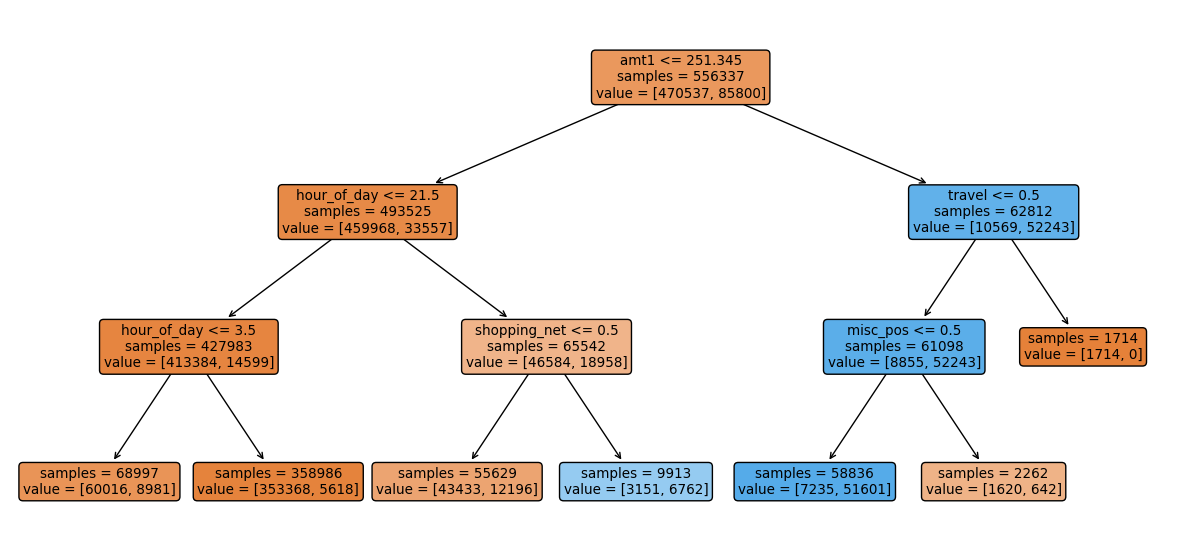

In [141]:
DTree = tree.DecisionTreeClassifier(max_depth=3)
DTree.fit(X1,y1)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

In [142]:
#Tree Validation
predict6 = DTree.predict(X1)

from sklearn.metrics import confusion_matrix
cm7 = confusion_matrix(y1, predict6)
print (cm7)

total = sum(sum(cm7))
# Calculate Accouracy
accuracy = (cm7[0,0]+cm7[1,1])/total
print(accuracy)

[[460151  10386]
 [ 27437  58363]]
0.9320142287857899


In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.2, random_state=101)

In [145]:
X_train1

,amt1,hour_of_day,city_pop,trans_month,trans_Date,age,entertainment,food_dining,gas_transport,grocery_net,grocery_pos,health_fitness,home,kids_pets,misc_net,misc_pos,personal_care,shopping_net,shopping_pos,travel
160634,79.67,20,419,8,16,33,0,0,0,0,0,0,1,0,0,0,0,0,0,0
322667,34.01,8,47249,10,22,43,0,0,0,0,1,0,0,0,0,0,0,0,0,0
62070,102.42,23,5211,7,12,36,0,1,0,0,0,0,0,0,0,0,0,0,0,0
412237,4.28,12,757530,11,30,44,0,0,0,0,0,0,0,0,0,1,0,0,0,0
518773,99.74,9,2456,12,23,29,0,0,0,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70681,105.98,10,736284,7,15,71,0,0,0,0,1,0,0,0,0,0,0,0,0,0
151587,79.47,3,2456,8,13,29,0,0,0,0,1,0,0,0,0,0,0,0,0,0
460836,890.64,1,11256,12,11,51,0,0,0,0,0,0,0,0,1,0,0,0,0,0
46877,75.30,5,765,7,7,51,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [146]:
#training Tree Model
clf2 = tree.DecisionTreeClassifier(max_depth=8)
clf2.fit(X_train1,y_train1)

predict1 = clf2.predict(X_train1)
predict2 = clf2.predict(X_test1)

#On Train Data
cm1 = confusion_matrix(y_train1,predict1)
print(cm1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test1,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[372647   3673]
 [  5768  62981]]
Train Accuracy 0.9787875587830202
[[93210  1007]
 [ 1469 15582]]
Test Accuracy 0.9777474206420534


In [147]:
# On train data
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9902396896258503
Specificity :  0.9161005978268775


In [148]:
# On test data
sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Sensitivity :  0.9893119076175213
Specificity :  0.9138466952084922


|--- amt1 <= 251.35
|   |--- hour_of_day <= 21.50
|   |   |--- hour_of_day <= 3.50
|   |   |   |--- amt1 <= 23.70
|   |   |   |   |--- gas_transport <= 0.50
|   |   |   |   |   |--- grocery_net <= 0.50
|   |   |   |   |   |   |--- age <= 52.50
|   |   |   |   |   |   |   |--- misc_pos <= 0.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- misc_pos >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- age >  52.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- grocery_net >  0.50
|   |   |   |   |   |   |--- amt1 <= 17.11
|   |   |   |   |   |   |   |--- age <= 28.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- age >  28.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- amt1 >  17.11
|   |   |   |   |   |   |   |--- city_pop <= 145.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- city_pop >  145.50
|   |   |   |  

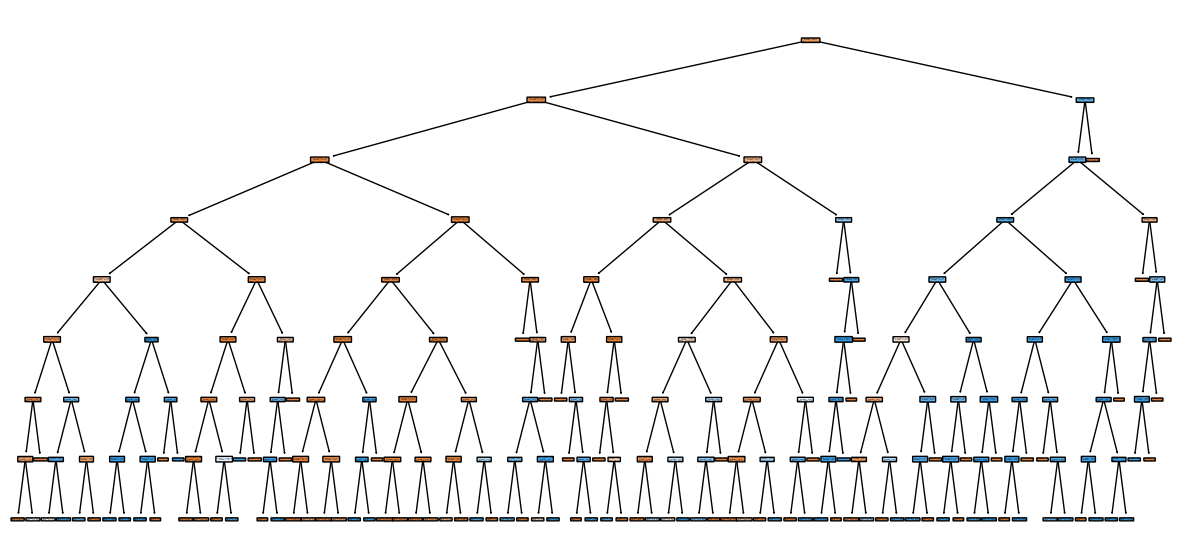

In [149]:
DTree = tree.DecisionTreeClassifier(max_depth=8)
DTree.fit(X1,y1)

##Plotting the trees
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(15,7))
plot_tree(DTree, filled=True,
                     rounded=True,
                     impurity=False,
                     feature_names = features)
print( export_text(DTree, feature_names = features))

# Task 8:- Ensemble Method

## 1) Random Forest


Random forest is a ensemble method, in which we develop small size of decision trees and each of trees will grow by predicting the random subset of predictors.<br>
<para>In random forest there is a parameter call as max\_features , in which we can allow subsets of predictors means we can allow some features only for each model.For regression problem size of subset is P/3 and in classification problem is $\sqrt{P}$.
several predictors are not used for a building  a small tree.small tree is a weak learner.However we grow large number small decision tree and aggregate and ensembled all their predictions.we get improvement in predictions accuracy.

In [150]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100, max_features=4, max_depth=8)

forest.fit(X_train1,y_train1)

RandomForestClassifier(max_depth=8, max_features=4)

In [151]:
predict1 = forest.predict(X_train1)
predict2 = forest.predict(X_test1)

#On Train Data
cm1 = confusion_matrix(y_train1,predict1)
print(cm1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test1,predict2)
print(cm2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

[[375375    945]
 [ 21255  47494]]
Train Accuracy 0.9501200937382743
[[93948   269]
 [ 5322 11729]]
Test Accuracy 0.9497519502462523


In [152]:
#On Test Data
cm = confusion_matrix(y_test1,predict2)
print(cm)
total = sum(sum(cm))
accuracy = (cm[0,0]+cm2[1,1])/total
print("Test Accuracy", accuracy)

sensitivity_2 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity_2 )

specificity_2 = cm2[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity_2)

[[93948   269]
 [ 5322 11729]]
Test Accuracy 0.9497519502462523
Sensitivity :  0.9971448889266268
Specificity :  0.6878775438390711


We can see by random forest , got specificity is 0.69 that means around 69% fraud transactions are detected by the random forest model.

In [153]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth=9)
tree.fit(X_train1,y_train1)

DecisionTreeClassifier(max_depth=9)

In [154]:
#Accuracy on train data
print("Decision Tree Results \n")
print("Accuracy on train data" , tree.score(X_train1, y_train1))
print("Accuracy on test data" , tree.score(X_test1, y_test1))

Decision Tree Results 

Accuracy on train data 0.9829981418611496
Accuracy on test data 0.981809684725168


## 2) Boosting.

GBM-Gradient Boosting Method is ensemble method, In which instead of building a model we build multiple models colate their results. By building multiple models we get bit of lift
in accuracy.

In [155]:
import time
from sklearn.ensemble import GradientBoostingClassifier
import xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix , f1_score
from sklearn import preprocessing

In [156]:

from sklearn.ensemble import GradientBoostingClassifier
boost=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, verbose=1)
##fitting the gradient boost classifier
start_time = time.time()
boost.fit(X_train1,y_train1)
print("Time taken by GBM "+ str((time.time() - start_time))+ " Seconds")

      Iter       Train Loss   Remaining Time 
         1           0.7545            1.21m
         2           0.6885            1.20m
         3           0.6360            1.21m
         4           0.5973            1.20m
         5           0.5665            1.19m
         6           0.5383            1.17m
         7           0.5155            1.19m
         8           0.4945            1.24m
         9           0.4771            1.28m
        10           0.4544            1.31m
        20           0.3295            1.09m
        30           0.2736            1.31m
        40           0.2439            1.18m
        50           0.2214           55.85s
        60           0.2016           42.55s
        70           0.1831           30.79s
        80           0.1734           20.10s
        90           0.1618            9.74s
       100           0.1528            0.00s
Time taken by GBM 96.15234518051147 Seconds


#### 1) GBM Result

In [157]:
# predicting Gradient boosting model on the train Data
boost_predict_train=boost.predict(X_train1)
cm1 = confusion_matrix(y_train1,boost_predict_train)
print(cm1)

accuracy_train=f1_score(y_train, boost_predict_train, average='micro')
print("train accuracy", accuracy_train)

[[373803   2517]
 [  7282  61467]]
train accuracy 0.9779831891234843


In [158]:
# predicting Gradient boosting model on the test Data
boost_predict_test=boost.predict(X_test1)
cm1 = confusion_matrix(y_test1,boost_predict_test)
print(cm1)

accuracy_test=f1_score(y_test1, boost_predict_test, average='micro')
print("test accuracy", accuracy_test)

[[93533   684]
 [ 1904 15147]]
test accuracy 0.9767408419311931


In [159]:
cm_1 = confusion_matrix(y_test1,boost_predict_test)
print(cm_1)



sensitivity_1 = cm_1[0,0]/(cm_1[0,0]+cm_1[0,1])
print('Sensitivity : ', sensitivity_1 )

specificity_1 = cm_1[1,1]/(cm_1[1,0]+cm_1[1,1])
print('Specificity : ', specificity_1)

[[93533   684]
 [ 1904 15147]]
Sensitivity :  0.9927401636647314
Specificity :  0.8883349950149552


Feature Importance Plot

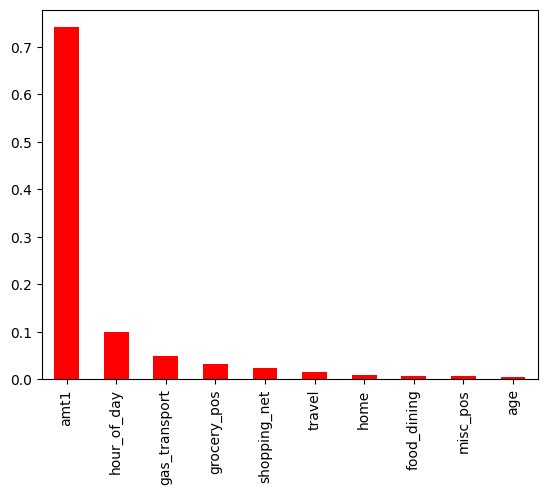

In [160]:
Importances = pd.Series(boost.feature_importances_,index=X_train1.columns)
Importances.nlargest(10).plot.bar(color='red')
plt.show()

We can see that 'amt' feature is very important in the model.

We can see that in GBM model, we get specificity is 0.8902 that is our model is detecting almost 89% fraud.

#### 2) XGB Model

In [161]:
# Creating XGB friendly data and matrices
train_labels = y_train1.values
train_labels = preprocessing.LabelEncoder().fit_transform(train_labels)

test_labels = y_test1.values
test_labels = preprocessing.LabelEncoder().fit_transform(test_labels)

matrix_train = xgboost.DMatrix(X_train1,label=train_labels)
matrix_test = xgboost.DMatrix(X_test1,label=test_labels)

In [162]:
params = {
    'max_depth': 8,
    'eta':0.1, #Learning Rate
    'eval_metric':'merror', # Multiclass classification error rate.
    'num_class': 2
}

start_time = time.time()

model=xgboost.train(params=params,
                    dtrain=matrix_train,
                    num_boost_round=100,    #Number of trees
                    early_stopping_rounds=4, # Stop after 4 rounds, if test error doesn't improve.
                    evals=[(matrix_test,'test')]
                   )

print("Time taken by XGB "+ str((time.time() - start_time))+ " Seconds")

[0]	test-merror:0.02226
[1]	test-merror:0.02025
[2]	test-merror:0.02109
[3]	test-merror:0.02142
[4]	test-merror:0.02145
[5]	test-merror:0.02081
Time taken by XGB 11.956237077713013 Seconds


In [163]:
###prediction using XGB on the train Data
boost_predict_train=model.predict(matrix_train)
cm_4 = confusion_matrix(train_labels,boost_predict_train)
print(cm_4)

accuracy_train=f1_score(train_labels, boost_predict_train, average='micro')
print("train accuracy", accuracy_train)

[[372700   3620]
 [  5204  63545]]
train accuracy 0.9801738606822762


In [164]:
###prediction using XGB on the test Data
boost_predict_test=model.predict(matrix_test)
cm_5 = confusion_matrix(test_labels,boost_predict_test)
print(cm_5)

accuracy_test=f1_score(test_labels, boost_predict_test, average='micro')
print("test accuracy", accuracy_test)

[[93228   989]
 [ 1327 15724]]
test accuracy 0.9791853902289966


In [165]:
sensitivity_5 = cm_5[0,0]/(cm_5[0,0]+cm_5[0,1])
print('Sensitivity : ', sensitivity_5 )

specificity_5 = cm_5[1,1]/(cm_5[1,0]+cm_5[1,1])
print('Specificity : ', specificity_5)

Sensitivity :  0.9895029559421336
Specificity :  0.9221746525130491


We have got specificity is 0.93 .

We  can see that among all the models XGB model is performing well .